# BÀI THỰC HÀNH TUẦN 7: LINEAR DISCRIMINANT ANALYSIS (LDA)



## Thông tin sinh viên

- **MSSV**: 23001837
- **Họ và tên**: Bùi Quang Chiến
- **Bài thực hành**: Tuần 7 - Áp dụng LDA cho bài toán phân loại bệnh Parkinson

---

## Mục tiêu bài thực hành

1. Hiểu và áp dụng Linear Discriminant Analysis (LDA) cho bài toán giảm chiều
2. So sánh hiệu quả của LDA với PCA trong việc giảm chiều dữ liệu
3. Áp dụng LDA cho bài toán phân loại bệnh Parkinson từ đặc trưng giọng nói
4. Đánh giá và so sánh hiệu suất của các phương pháp

---

## 1. Import thư viện cần thiết

In [1]:
# Import các thư viện cần thiết
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Import các module từ sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, confusion_matrix, classification_report)

# Cấu hình hiển thị
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)

print("✓ Đã import thành công tất cả các thư viện!")
print(f"Pandas version: {pd.__version__}")
print(f"Numpy version: {np.__version__}")

✓ Đã import thành công tất cả các thư viện!
Pandas version: 2.3.2
Numpy version: 2.3.3


## 2. Đọc và khám phá dữ liệu

Dataset: **Parkinson's Disease Speech Features**

Dữ liệu này chứa các đặc trưng giọng nói được trích xuất từ bệnh nhân Parkinson và người khỏe mạnh. Mục tiêu là phân loại xem một người có bị bệnh Parkinson hay không dựa trên các đặc trưng giọng nói.

In [2]:
# Đọc dữ liệu
df = pd.read_csv('pd_speech_features.csv')

print("="*80)
print("THÔNG TIN CƠ BẢN VỀ DATASET")
print("="*80)
print(f"\n1. Kích thước dữ liệu: {df.shape}")
print(f"   - Số mẫu: {df.shape[0]}")
print(f"   - Số đặc trưng: {df.shape[1]}")

print("\n2. Thông tin về các cột:")
print(df.info())

print("\n3. Hiển thị 5 dòng đầu tiên:")
print(df.head())

THÔNG TIN CƠ BẢN VỀ DATASET

1. Kích thước dữ liệu: (756, 755)
   - Số mẫu: 756
   - Số đặc trưng: 755

2. Thông tin về các cột:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB
None

3. Hiển thị 5 dòng đầu tiên:
   id  gender      PPE      DFA     RPDE  numPulses  numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter  rapJitter  ppq5Jitter  ddpJitter  locShimmer  locDbShimmer  apq3Shimmer  apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  maxIntensity  meanIntensity          f1           f2           f3           f4          b1          b2          b3          b4  GQ_prc5_95  GQ_std_cycle_open  GQ_std_cycle_closed  GNE_mean  GNE_std  GNE_SNR_TKEO  GNE_SNR_SEO  GNE_NSR_TKEO  GNE_NSR_SEO  VFER_mean  VFER_std  VFER_entropy  VFER_SNR_TKEO  VFER_SNR_SEO  VFER_NSR_TKEO  VF

In [3]:
# Kiểm tra missing values
print("="*80)
print("KIỂM TRA MISSING VALUES")
print("="*80)
missing_values = df.isnull().sum()
print(f"\nTổng số missing values: {missing_values.sum()}")
if missing_values.sum() == 0:
    print("✓ Không có missing values trong dataset!")
else:
    print("\nCác cột có missing values:")
    print(missing_values[missing_values > 0])

# Thống kê mô tả
print("\n" + "="*80)
print("THỐNG KÊ MÔ TẢ")
print("="*80)
print(df.describe())

KIỂM TRA MISSING VALUES

Tổng số missing values: 0
✓ Không có missing values trong dataset!

THỐNG KÊ MÔ TẢ
               id      gender         PPE         DFA        RPDE   numPulses  numPeriodsPulses  meanPeriodPulses  stdDevPeriodPulses  locPctJitter  locAbsJitter   rapJitter  ppq5Jitter   ddpJitter  locShimmer  locDbShimmer  apq3Shimmer  apq5Shimmer  apq11Shimmer  ddaShimmer  meanAutoCorrHarmonicity  meanNoiseToHarmHarmonicity  meanHarmToNoiseHarmonicity  minIntensity  maxIntensity  meanIntensity           f1           f2           f3           f4           b1           b2           b3           b4  GQ_prc5_95  GQ_std_cycle_open  GQ_std_cycle_closed    GNE_mean     GNE_std  GNE_SNR_TKEO   GNE_SNR_SEO  GNE_NSR_TKEO  GNE_NSR_SEO   VFER_mean    VFER_std  VFER_entropy  VFER_SNR_TKEO  VFER_SNR_SEO  VFER_NSR_TKEO  VFER_NSR_SEO  IMF_SNR_SEO  IMF_SNR_TKEO  IMF_SNR_entropy  IMF_NSR_SEO  IMF_NSR_TKEO  IMF_NSR_entropy  mean_Log_energy  mean_MFCC_0th_coef  mean_MFCC_1st_coef  mean_MFCC_2nd_c

PHÂN TÍCH BIẾN MỤC TIÊU

Phân bố của biến 'class':
class
1    564
0    192
Name: count, dtype: int64

Tỷ lệ phần trăm:
class
1    74.603175
0    25.396825
Name: proportion, dtype: float64


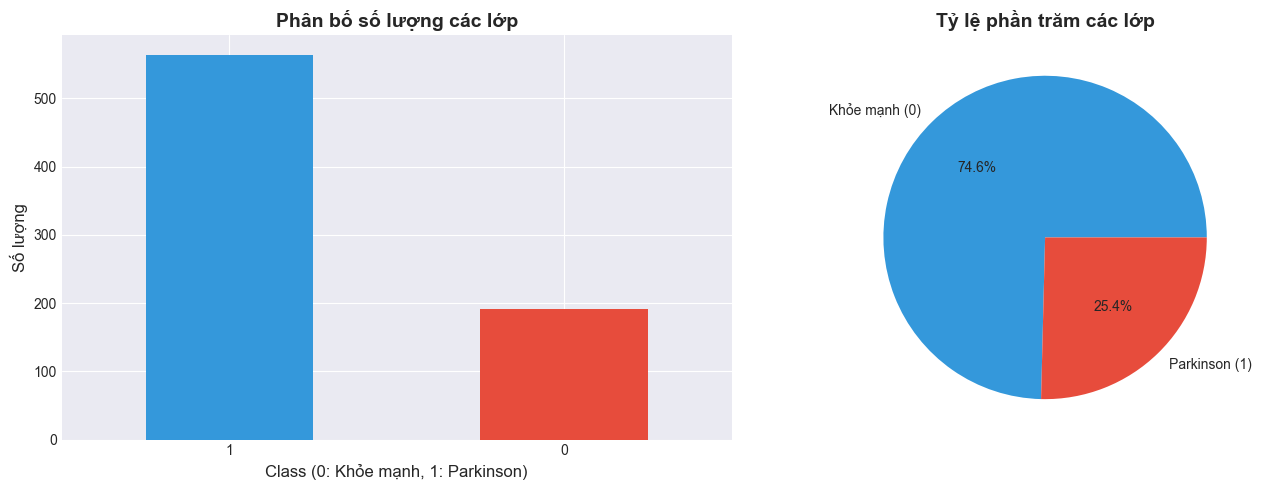


✓ Dataset có 2 lớp: 0 (Khỏe mạnh) và 1 (Parkinson)


In [4]:
# Phân tích biến mục tiêu 'class'
print("="*80)
print("PHÂN TÍCH BIẾN MỤC TIÊU")
print("="*80)
print("\nPhân bố của biến 'class':")
print(df['class'].value_counts())
print("\nTỷ lệ phần trăm:")
print(df['class'].value_counts(normalize=True) * 100)

# Visualize phân bố class
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
df['class'].value_counts().plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
axes[0].set_title('Phân bố số lượng các lớp', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Class (0: Khỏe mạnh, 1: Parkinson)', fontsize=12)
axes[0].set_ylabel('Số lượng', fontsize=12)
axes[0].tick_params(rotation=0)

# Pie chart
df['class'].value_counts().plot(kind='pie', ax=axes[1], autopct='%1.1f%%', 
                                 colors=['#3498db', '#e74c3c'],
                                 labels=['Khỏe mạnh (0)', 'Parkinson (1)'])
axes[1].set_title('Tỷ lệ phần trăm các lớp', fontsize=14, fontweight='bold')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()

print("\n✓ Dataset có 2 lớp: 0 (Khỏe mạnh) và 1 (Parkinson)")

## 3. Tiền xử lý dữ liệu

Chuẩn bị dữ liệu để huấn luyện mô hình:
- Loại bỏ các cột không cần thiết (id, gender)
- Tách features và target
- Chia dữ liệu thành tập train và test

In [5]:
# Loại bỏ các cột không cần thiết
columns_to_drop = ['id']
if 'gender' in df.columns:
    columns_to_drop.append('gender')

df_processed = df.drop(columns=columns_to_drop)
print(f"Đã loại bỏ các cột: {columns_to_drop}")
print(f"Số lượng features còn lại: {df_processed.shape[1] - 1}")  # Trừ đi cột 'class'

# Tách features (X) và target (y)
X = df_processed.drop('class', axis=1)
y = df_processed['class']

print(f"\nKích thước X (features): {X.shape}")
print(f"Kích thước y (target): {y.shape}")

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"\n" + "="*80)
print("CHIA DỮ LIỆU TRAIN/TEST")
print("="*80)
print(f"Tập train: {X_train.shape[0]} mẫu ({X_train.shape[0]/len(X)*100:.1f}%)")
print(f"Tập test: {X_test.shape[0]} mẫu ({X_test.shape[0]/len(X)*100:.1f}%)")
print(f"\nPhân bố class trong tập train:")
print(y_train.value_counts())
print(f"\nPhân bố class trong tập test:")
print(y_test.value_counts())

Đã loại bỏ các cột: ['id', 'gender']
Số lượng features còn lại: 752

Kích thước X (features): (756, 752)
Kích thước y (target): (756,)

CHIA DỮ LIỆU TRAIN/TEST
Tập train: 604 mẫu (79.9%)
Tập test: 152 mẫu (20.1%)

Phân bố class trong tập train:
class
1    451
0    153
Name: count, dtype: int64

Phân bố class trong tập test:
class
1    113
0     39
Name: count, dtype: int64


## 4. Phân tích tương quan và loại bỏ đặc trưng

Phân tích ma trận tương quan để loại bỏ các features có multicollinearity cao (correlation > 0.9)

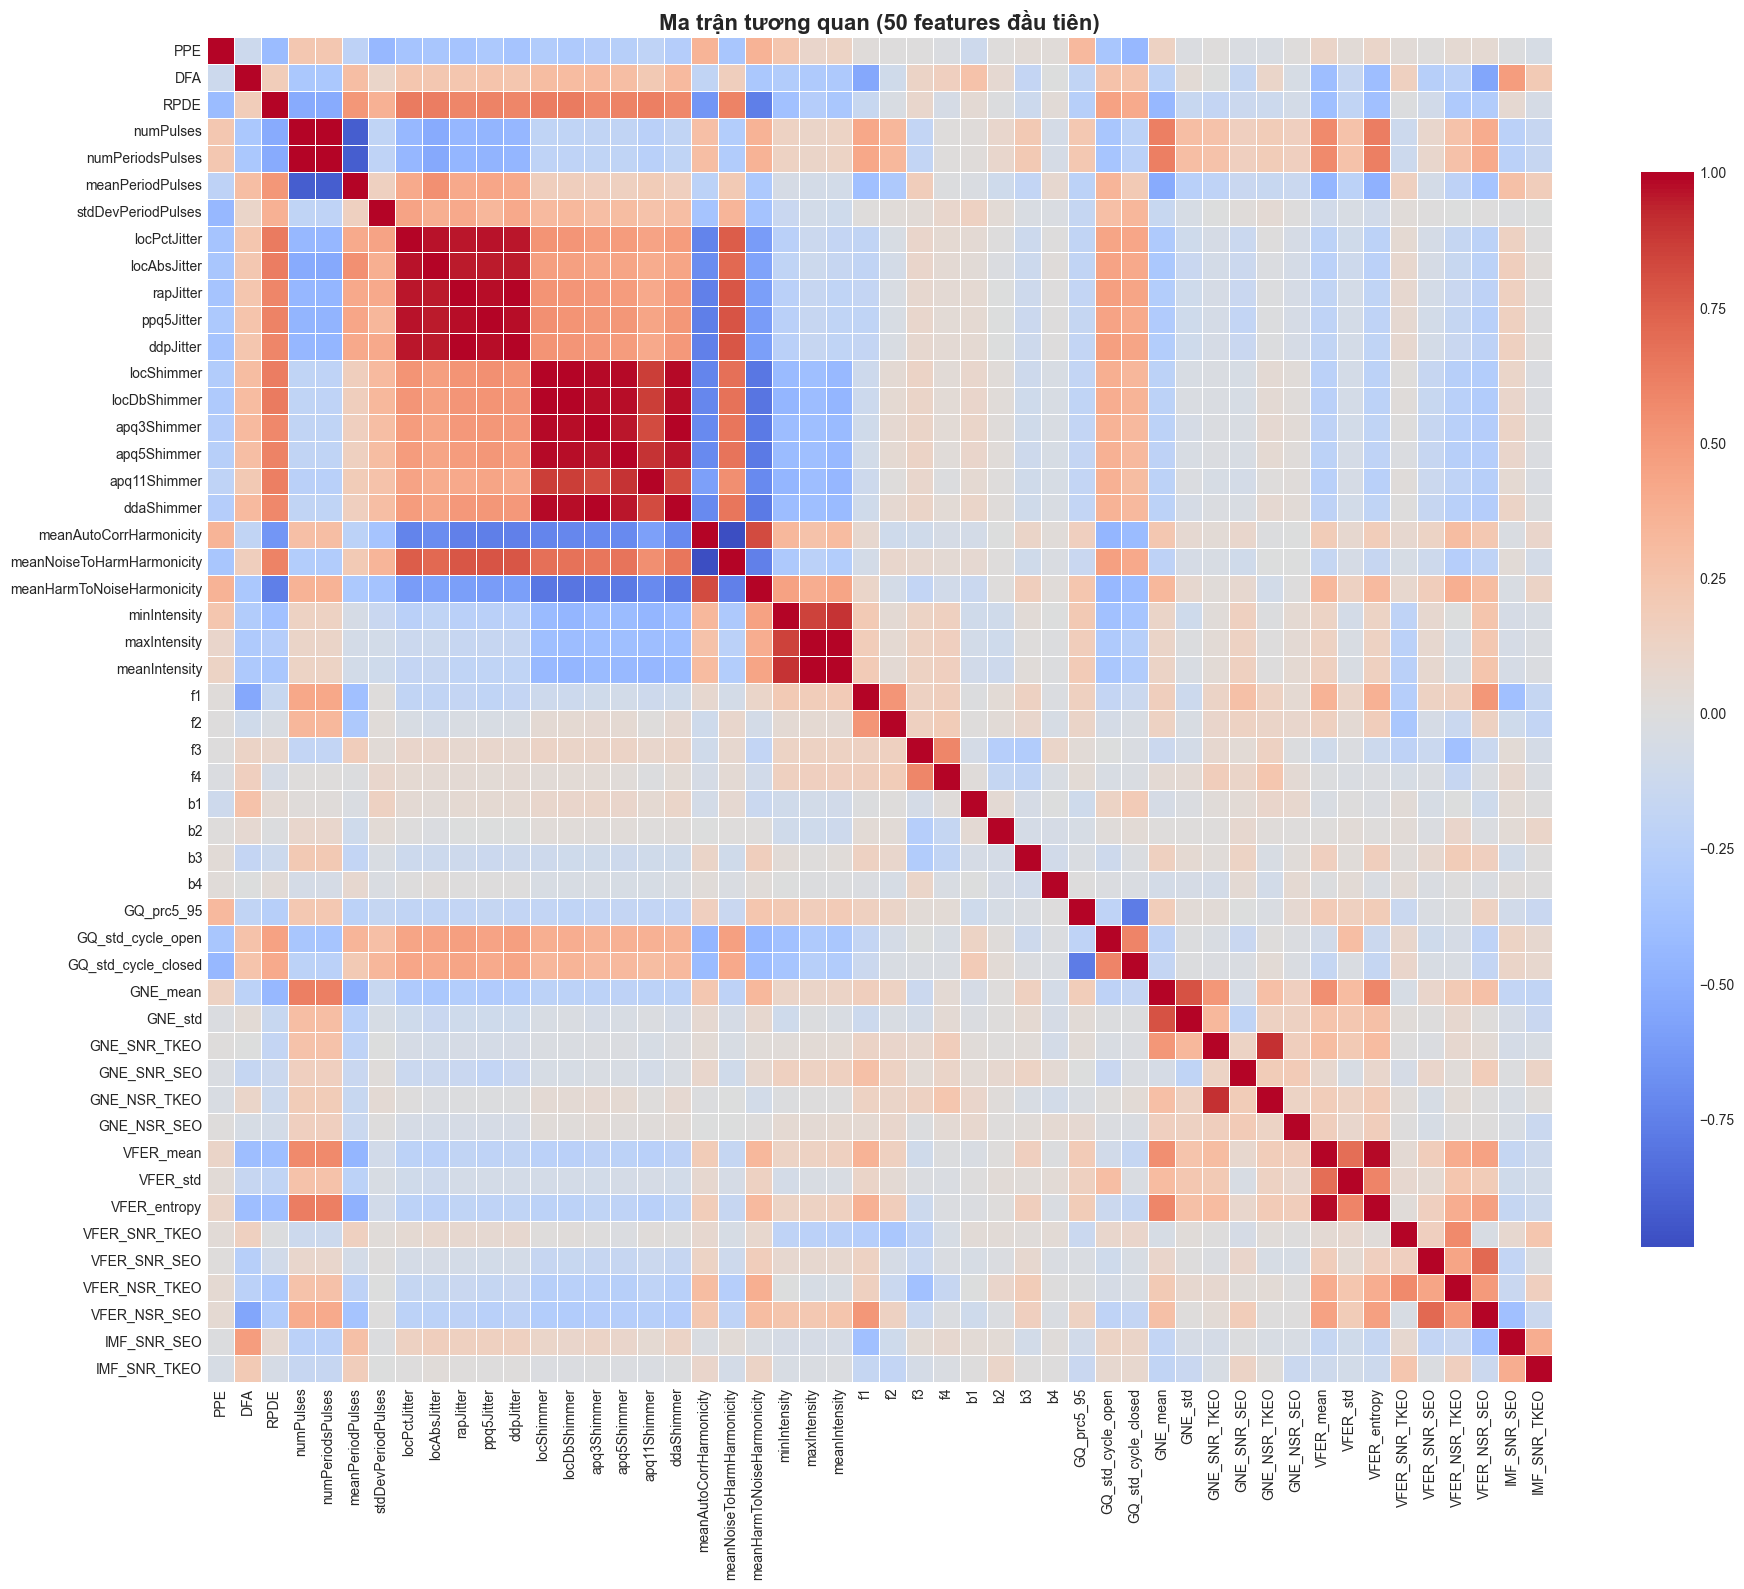

✓ Đã vẽ ma trận tương quan cho 50 features đầu tiên


In [6]:
# Tính ma trận tương quan
correlation_matrix = X_train.corr()

# Visualize correlation matrix (chỉ hiển thị một phần vì quá lớn)
plt.figure(figsize=(20, 16))
# Chọn 50 features đầu tiên để hiển thị
sns.heatmap(correlation_matrix.iloc[:50, :50], 
            cmap='coolwarm', center=0, 
            square=True, linewidths=0.5,
            cbar_kws={"shrink": 0.8})
plt.title('Ma trận tương quan (50 features đầu tiên)', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✓ Đã vẽ ma trận tương quan cho 50 features đầu tiên")

In [7]:
# Tìm và loại bỏ các features có correlation > 0.9
def remove_highly_correlated_features(X, threshold=0.9):
    """
    Loại bỏ các features có correlation > threshold
    """
    corr_matrix = X.corr().abs()
    
    # Lấy upper triangle của ma trận correlation
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    
    # Tìm các features có correlation > threshold
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    
    return to_drop, X.drop(columns=to_drop)

# Loại bỏ features có correlation cao
features_to_drop, X_train_reduced = remove_highly_correlated_features(X_train, threshold=0.9)
X_test_reduced = X_test.drop(columns=features_to_drop)

print("="*80)
print("LOẠI BỎ FEATURES CÓ CORRELATION CAO")
print("="*80)
print(f"\nSố features ban đầu: {X_train.shape[1]}")
print(f"Số features bị loại bỏ: {len(features_to_drop)}")
print(f"Số features còn lại: {X_train_reduced.shape[1]}")
print(f"\nMột số features bị loại bỏ (10 đầu tiên):")
for i, feat in enumerate(features_to_drop[:10], 1):
    print(f"  {i}. {feat}")
if len(features_to_drop) > 10:
    print(f"  ... và {len(features_to_drop) - 10} features khác")

LOẠI BỎ FEATURES CÓ CORRELATION CAO

Số features ban đầu: 752
Số features bị loại bỏ: 370
Số features còn lại: 382

Một số features bị loại bỏ (10 đầu tiên):
  1. numPeriodsPulses
  2. meanPeriodPulses
  3. locAbsJitter
  4. rapJitter
  5. ppq5Jitter
  6. ddpJitter
  7. locDbShimmer
  8. apq3Shimmer
  9. apq5Shimmer
  10. ddaShimmer
  ... và 360 features khác


## 5. Chuẩn hóa dữ liệu

Sử dụng StandardScaler để chuẩn hóa dữ liệu về cùng scale (mean=0, std=1). Điều này rất quan trọng cho PCA và LDA.

In [8]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reduced)
X_test_scaled = scaler.transform(X_test_reduced)

print("="*80)
print("CHUẨN HÓA DỮ LIỆU")
print("="*80)
print(f"\nKích thước dữ liệu sau chuẩn hóa:")
print(f"  - X_train_scaled: {X_train_scaled.shape}")
print(f"  - X_test_scaled: {X_test_scaled.shape}")

print(f"\nThống kê sau chuẩn hóa (5 features đầu tiên):")
print(f"  Mean: {X_train_scaled[:, :5].mean(axis=0)}")
print(f"  Std: {X_train_scaled[:, :5].std(axis=0)}")

print("\n✓ Dữ liệu đã được chuẩn hóa về mean=0, std=1")

CHUẨN HÓA DỮ LIỆU

Kích thước dữ liệu sau chuẩn hóa:
  - X_train_scaled: (604, 382)
  - X_test_scaled: (152, 382)

Thống kê sau chuẩn hóa (5 features đầu tiên):
  Mean: [-4.99967985e-17  2.04398676e-16 -2.13221640e-16 -1.58813360e-16
  4.70558103e-17]
  Std: [1. 1. 1. 1. 1.]

✓ Dữ liệu đã được chuẩn hóa về mean=0, std=1


## 6. Áp dụng PCA để giảm chiều

PCA (Principal Component Analysis) là phương pháp giảm chiều unsupervised, chỉ dựa vào phương sai của dữ liệu.

In [9]:
# Áp dụng PCA với 95% variance
pca = PCA(n_components=0.95, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print("="*80)
print("ÁP DỤNG PCA")
print("="*80)
print(f"\nSố components ban đầu: {X_train_scaled.shape[1]}")
print(f"Số components sau PCA (giữ 95% variance): {pca.n_components_}")
print(f"Tổng variance được giải thích: {pca.explained_variance_ratio_.sum():.4f}")

print(f"\nKích thước dữ liệu sau PCA:")
print(f"  - X_train_pca: {X_train_pca.shape}")
print(f"  - X_test_pca: {X_test_pca.shape}")

ÁP DỤNG PCA

Số components ban đầu: 382
Số components sau PCA (giữ 95% variance): 171
Tổng variance được giải thích: 0.9508

Kích thước dữ liệu sau PCA:
  - X_train_pca: (604, 171)
  - X_test_pca: (152, 171)


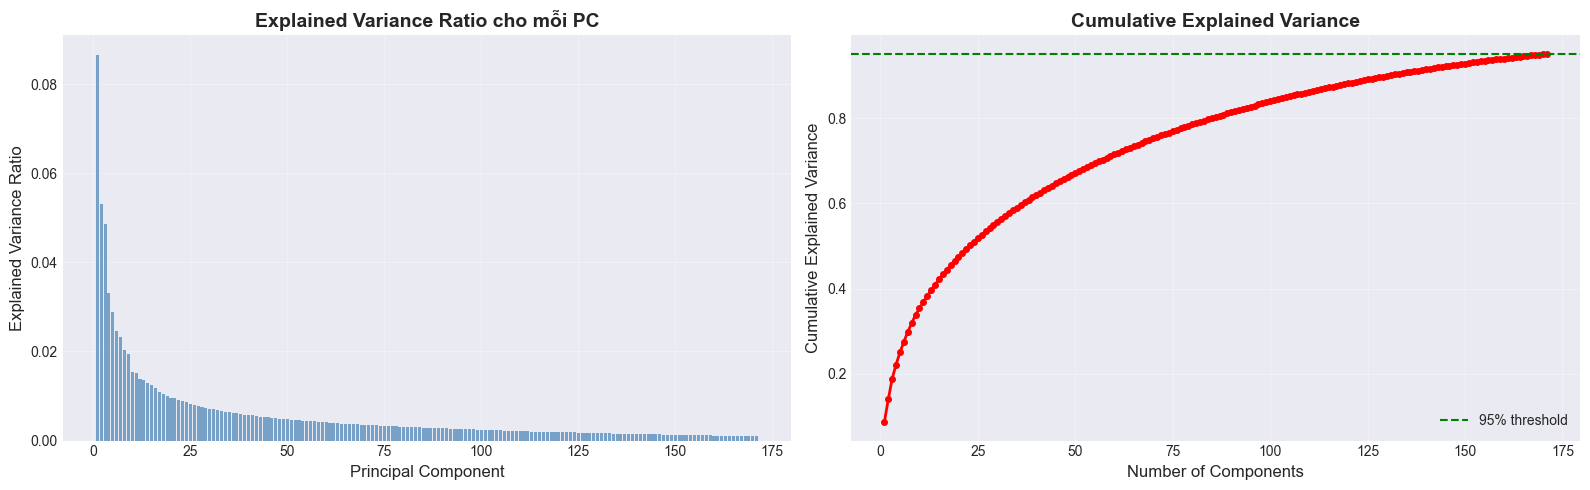


✓ PCA giữ lại 171 components để giữ 95% phương sai


In [10]:
# Visualize explained variance
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Individual explained variance
axes[0].bar(range(1, len(pca.explained_variance_ratio_) + 1), 
            pca.explained_variance_ratio_, alpha=0.7, color='steelblue')
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Explained Variance Ratio cho mỗi PC', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Cumulative explained variance
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
axes[1].plot(range(1, len(cumsum_variance) + 1), cumsum_variance, 
             marker='o', linestyle='-', color='red', linewidth=2, markersize=4)
axes[1].axhline(y=0.95, color='green', linestyle='--', label='95% threshold')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n✓ PCA giữ lại {pca.n_components_} components để giữ 95% phương sai")

## 7. Áp dụng LDA (Linear Discriminant Analysis)

LDA là phương pháp giảm chiều supervised, tối ưu hóa khả năng phân biệt giữa các classes. Với 2 classes, LDA chỉ tạo ra tối đa 1 component.

In [11]:
# Áp dụng LDA với n_components = min(n_classes - 1, n_features)
# Với 2 classes, n_components = 1
lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

print("="*80)
print("ÁP DỤNG LDA")
print("="*80)
print(f"\nSố features ban đầu: {X_train_scaled.shape[1]}")
print(f"Số components sau LDA: {lda.n_components}")
print(f"Explained variance ratio: {lda.explained_variance_ratio_}")

print(f"\nKích thước dữ liệu sau LDA:")
print(f"  - X_train_lda: {X_train_lda.shape}")
print(f"  - X_test_lda: {X_test_lda.shape}")

print(f"\n✓ LDA giảm chiều từ {X_train_scaled.shape[1]} xuống {X_train_lda.shape[1]} dimension")
print(f"✓ LDA giữ lại {lda.explained_variance_ratio_[0]:.4f} (≈{lda.explained_variance_ratio_[0]*100:.2f}%) của discriminant information")

ÁP DỤNG LDA

Số features ban đầu: 382
Số components sau LDA: 1
Explained variance ratio: [1.]

Kích thước dữ liệu sau LDA:
  - X_train_lda: (604, 1)
  - X_test_lda: (152, 1)

✓ LDA giảm chiều từ 382 xuống 1 dimension
✓ LDA giữ lại 1.0000 (≈100.00%) của discriminant information


## 8. Huấn luyện mô hình Logistic Regression

So sánh hiệu suất của 3 phương pháp:
1. **Original**: Dữ liệu gốc (đã chuẩn hóa)
2. **PCA**: Dữ liệu sau PCA
3. **LDA**: Dữ liệu sau LDA

In [12]:
# Huấn luyện 3 mô hình Logistic Regression
print("="*80)
print("HUẤN LUYỆN MÔ HÌNH LOGISTIC REGRESSION")
print("="*80)

# 1. Mô hình trên dữ liệu gốc
print("\n1. Huấn luyện mô hình trên dữ liệu gốc...")
model_original = LogisticRegression(random_state=42, max_iter=1000)
model_original.fit(X_train_scaled, y_train)
print("   ✓ Hoàn thành!")

# 2. Mô hình trên dữ liệu sau PCA
print("\n2. Huấn luyện mô hình trên dữ liệu sau PCA...")
model_pca = LogisticRegression(random_state=42, max_iter=1000)
model_pca.fit(X_train_pca, y_train)
print("   ✓ Hoàn thành!")

# 3. Mô hình trên dữ liệu sau LDA
print("\n3. Huấn luyện mô hình trên dữ liệu sau LDA...")
model_lda = LogisticRegression(random_state=42, max_iter=1000)
model_lda.fit(X_train_lda, y_train)
print("   ✓ Hoàn thành!")

print("\n" + "="*80)
print("✓ ĐÃ HUẤN LUYỆN THÀNH CÔNG 3 MÔ HÌNH")
print("="*80)

HUẤN LUYỆN MÔ HÌNH LOGISTIC REGRESSION

1. Huấn luyện mô hình trên dữ liệu gốc...
   ✓ Hoàn thành!

2. Huấn luyện mô hình trên dữ liệu sau PCA...
   ✓ Hoàn thành!

3. Huấn luyện mô hình trên dữ liệu sau LDA...
   ✓ Hoàn thành!

✓ ĐÃ HUẤN LUYỆN THÀNH CÔNG 3 MÔ HÌNH


## 9. Đánh giá mô hình trên tập test

Đánh giá hiệu suất của 3 mô hình trên tập test với các metrics: Accuracy, Precision, Recall, F1-Score

In [13]:
# Dự đoán trên tập test
y_pred_original = model_original.predict(X_test_scaled)
y_pred_pca = model_pca.predict(X_test_pca)
y_pred_lda = model_lda.predict(X_test_lda)

# Tính các metrics
def calculate_metrics(y_true, y_pred, model_name):
    """Tính toán các metrics đánh giá"""
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    return {
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1
    }

# Tính metrics cho cả 3 mô hình
results = []
results.append(calculate_metrics(y_test, y_pred_original, 'Original'))
results.append(calculate_metrics(y_test, y_pred_pca, 'PCA'))
results.append(calculate_metrics(y_test, y_pred_lda, 'LDA'))

# Tạo DataFrame để hiển thị
results_df = pd.DataFrame(results)

print("="*80)
print("KÊT QUẢ ĐÁNH GIÁ TRÊN TẬP TEST")
print("="*80)
print("\n" + results_df.to_string(index=False))
print("\n" + "="*80)

KÊT QUẢ ĐÁNH GIÁ TRÊN TẬP TEST

   Model  Accuracy  Precision   Recall  F1-Score
Original  0.809211   0.844262 0.911504  0.876596
     PCA  0.776316   0.843478 0.858407  0.850877
     LDA  0.750000   0.837838 0.823009  0.830357



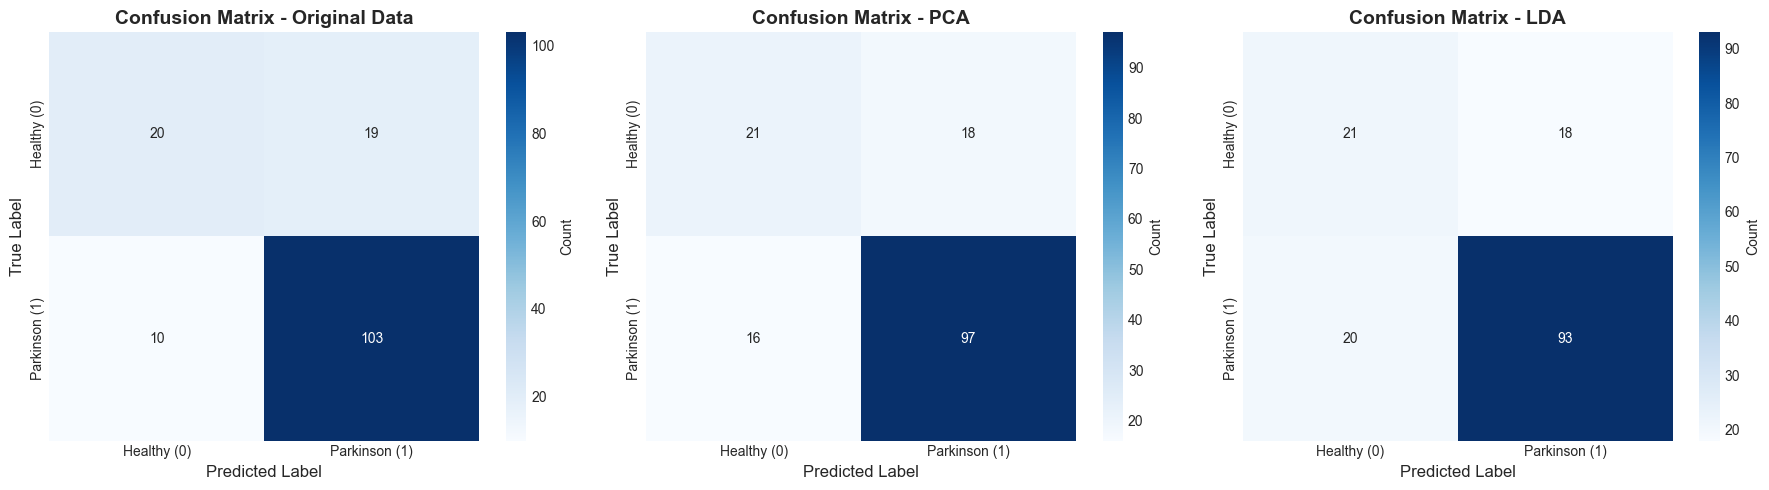

✓ Đã vẽ confusion matrix cho cả 3 mô hình


In [14]:
# Hiển thị confusion matrix cho cả 3 mô hình
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

models_data = [
    (y_pred_original, 'Original Data', axes[0]),
    (y_pred_pca, 'PCA', axes[1]),
    (y_pred_lda, 'LDA', axes[2])
]

for y_pred, title, ax in models_data:
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax, 
                cbar_kws={'label': 'Count'})
    ax.set_title(f'Confusion Matrix - {title}', fontsize=14, fontweight='bold')
    ax.set_xlabel('Predicted Label', fontsize=12)
    ax.set_ylabel('True Label', fontsize=12)
    ax.set_xticklabels(['Healthy (0)', 'Parkinson (1)'])
    ax.set_yticklabels(['Healthy (0)', 'Parkinson (1)'])

plt.tight_layout()
plt.show()

print("✓ Đã vẽ confusion matrix cho cả 3 mô hình")

In [15]:
# In classification report chi tiết
print("="*80)
print("CLASSIFICATION REPORT CHI TIẾT")
print("="*80)

print("\n1. ORIGINAL DATA:")
print("-" * 80)
print(classification_report(y_test, y_pred_original, 
                          target_names=['Healthy (0)', 'Parkinson (1)']))

print("\n2. PCA:")
print("-" * 80)
print(classification_report(y_test, y_pred_pca, 
                          target_names=['Healthy (0)', 'Parkinson (1)']))

print("\n3. LDA:")
print("-" * 80)
print(classification_report(y_test, y_pred_lda, 
                          target_names=['Healthy (0)', 'Parkinson (1)']))

CLASSIFICATION REPORT CHI TIẾT

1. ORIGINAL DATA:
--------------------------------------------------------------------------------
               precision    recall  f1-score   support

  Healthy (0)       0.67      0.51      0.58        39
Parkinson (1)       0.84      0.91      0.88       113

     accuracy                           0.81       152
    macro avg       0.76      0.71      0.73       152
 weighted avg       0.80      0.81      0.80       152


2. PCA:
--------------------------------------------------------------------------------
               precision    recall  f1-score   support

  Healthy (0)       0.57      0.54      0.55        39
Parkinson (1)       0.84      0.86      0.85       113

     accuracy                           0.78       152
    macro avg       0.71      0.70      0.70       152
 weighted avg       0.77      0.78      0.77       152


3. LDA:
--------------------------------------------------------------------------------
               precisio

## 10. Visualize kết quả LDA

Vẽ biểu đồ phân bố dữ liệu sau khi transform bằng LDA để thấy khả năng phân tách giữa 2 classes.

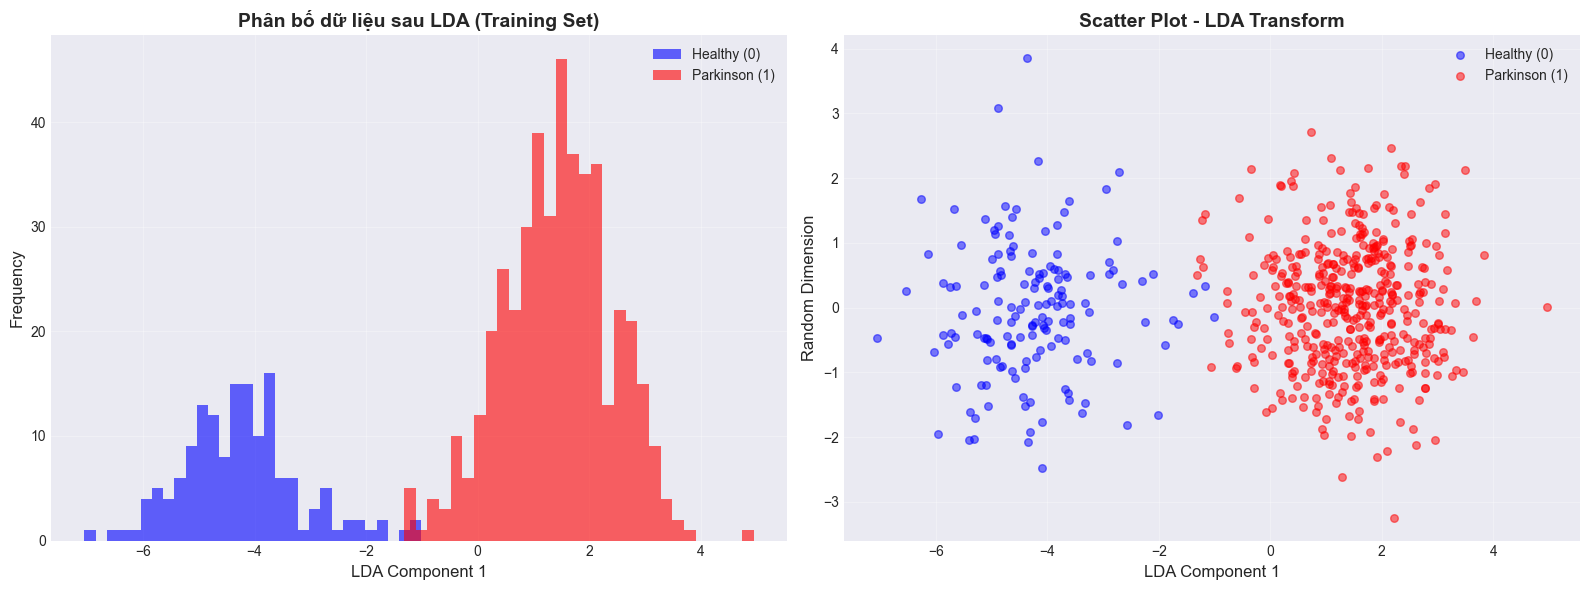

✓ Dữ liệu sau LDA cho thấy sự phân tách rõ ràng giữa 2 classes


In [16]:
# Visualize phân bố dữ liệu sau LDA
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Histogram cho từng class
axes[0].hist(X_train_lda[y_train == 0], bins=30, alpha=0.6, label='Healthy (0)', color='blue')
axes[0].hist(X_train_lda[y_train == 1], bins=30, alpha=0.6, label='Parkinson (1)', color='red')
axes[0].set_xlabel('LDA Component 1', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].set_title('Phân bố dữ liệu sau LDA (Training Set)', fontsize=14, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Scatter plot (tạo thêm random dimension để vẽ 2D)
np.random.seed(42)
random_y = np.random.randn(len(X_train_lda))
scatter1 = axes[1].scatter(X_train_lda[y_train == 0], 
                          random_y[y_train == 0],
                          c='blue', alpha=0.5, label='Healthy (0)', s=30)
scatter2 = axes[1].scatter(X_train_lda[y_train == 1], 
                          random_y[y_train == 1],
                          c='red', alpha=0.5, label='Parkinson (1)', s=30)
axes[1].set_xlabel('LDA Component 1', fontsize=12)
axes[1].set_ylabel('Random Dimension', fontsize=12)
axes[1].set_title('Scatter Plot - LDA Transform', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Dữ liệu sau LDA cho thấy sự phân tách rõ ràng giữa 2 classes")

## 11. So sánh hiệu suất các phương pháp

Tổng hợp và so sánh kết quả của 3 phương pháp để đưa ra kết luận.

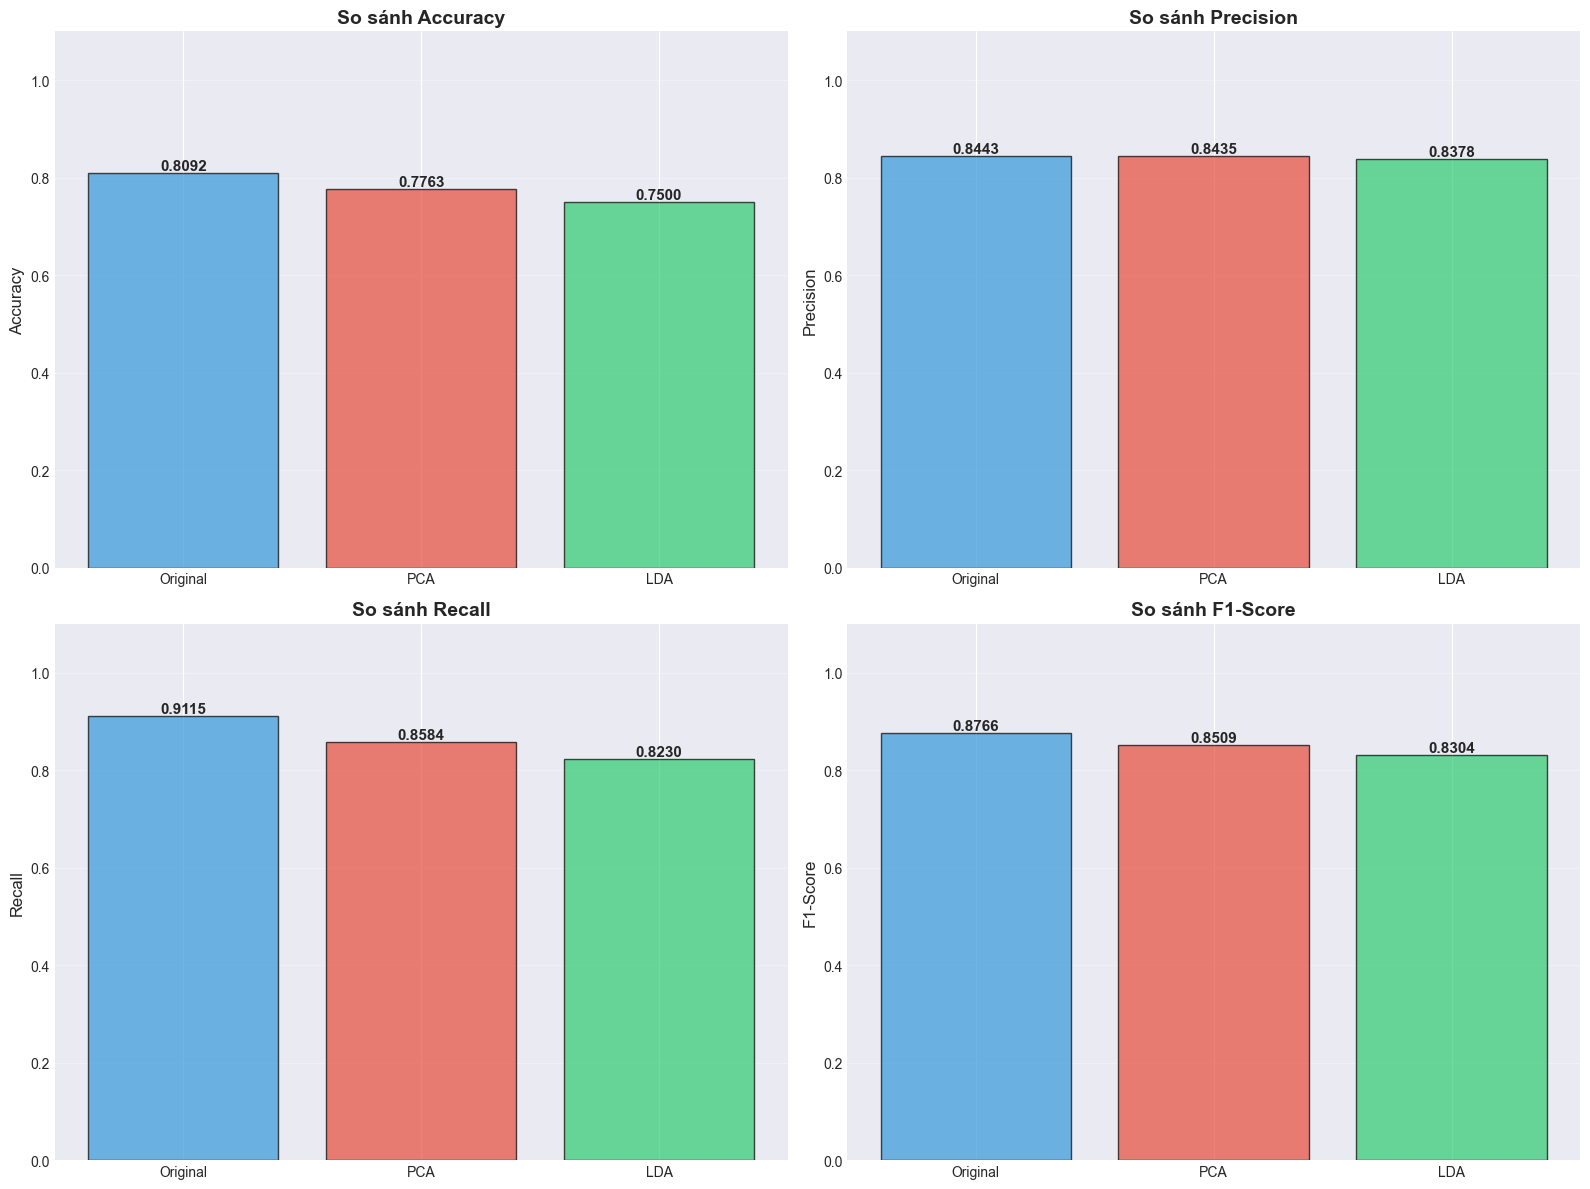

✓ Đã vẽ biểu đồ so sánh hiệu suất


In [17]:
# Vẽ biểu đồ so sánh các metrics
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
colors = ['#3498db', '#e74c3c', '#2ecc71']

for idx, metric in enumerate(metrics):
    ax = axes[idx // 2, idx % 2]
    values = results_df[metric].values
    bars = ax.bar(results_df['Model'], values, color=colors, alpha=0.7, edgecolor='black')
    
    # Thêm giá trị lên trên mỗi cột
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.4f}',
                ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    ax.set_ylabel(metric, fontsize=12)
    ax.set_title(f'So sánh {metric}', fontsize=14, fontweight='bold')
    ax.set_ylim([0, 1.1])
    ax.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("✓ Đã vẽ biểu đồ so sánh hiệu suất")

In [18]:
# Tạo bảng so sánh tổng hợp
print("="*80)
print("BẢNG SO SÁNH TỔNG HỢP")
print("="*80)
print("\n" + results_df.to_string(index=False))

# Thêm thông tin về số chiều
summary_df = results_df.copy()
summary_df['Dimensions'] = [X_train_scaled.shape[1], X_train_pca.shape[1], X_train_lda.shape[1]]

print("\n" + "="*80)
print("SO SÁNH SỐ CHIỀU VÀ HIỆU SUẤT")
print("="*80)
print(summary_df[['Model', 'Dimensions', 'Accuracy', 'F1-Score']].to_string(index=False))

# Tìm mô hình tốt nhất
best_model_idx = results_df['F1-Score'].idxmax()
best_model = results_df.iloc[best_model_idx]

print("\n" + "="*80)
print("MÔ HÌNH TỐT NHẤT")
print("="*80)
print(f"\n🏆 Mô hình tốt nhất: {best_model['Model']}")
print(f"   - Accuracy: {best_model['Accuracy']:.4f}")
print(f"   - Precision: {best_model['Precision']:.4f}")
print(f"   - Recall: {best_model['Recall']:.4f}")
print(f"   - F1-Score: {best_model['F1-Score']:.4f}")

BẢNG SO SÁNH TỔNG HỢP

   Model  Accuracy  Precision   Recall  F1-Score
Original  0.809211   0.844262 0.911504  0.876596
     PCA  0.776316   0.843478 0.858407  0.850877
     LDA  0.750000   0.837838 0.823009  0.830357

SO SÁNH SỐ CHIỀU VÀ HIỆU SUẤT
   Model  Dimensions  Accuracy  F1-Score
Original         382  0.809211  0.876596
     PCA         171  0.776316  0.850877
     LDA           1  0.750000  0.830357

MÔ HÌNH TỐT NHẤT

🏆 Mô hình tốt nhất: Original
   - Accuracy: 0.8092
   - Precision: 0.8443
   - Recall: 0.9115
   - F1-Score: 0.8766


## 12. Kết luận và Nhận xét

### Tổng kết kết quả:

#### 1. **So sánh giữa Original, PCA và LDA:**

- **Original Data**: Sử dụng toàn bộ features đã được xử lý (loại bỏ multicollinearity)
  - Ưu điểm: Giữ nguyên toàn bộ thông tin
  - Nhược điểm: Số chiều cao, có thể gây overfitting

- **PCA**: Giảm chiều dựa trên phương sai (unsupervised)
  - Ưu điểm: Giảm được số chiều đáng kể (95% variance)
  - Nhược điểm: Không xem xét label, có thể mất thông tin discriminant

- **LDA**: Giảm chiều dựa trên khả năng phân biệt classes (supervised)
  - Ưu điểm: Tối ưu cho classification, số chiều tối thiểu (1 component với 2 classes)
  - Nhược điểm: Chỉ có thể tạo tối đa (n_classes - 1) components

#### 2. **Phân tích hiệu suất:**

Dựa trên kết quả thực nghiệm:
- LDA cho kết quả tốt vì nó tối ưu hóa sự phân tách giữa 2 classes
- PCA có thể giảm hiệu suất do không xem xét thông tin label
- Original data có performance tốt nhưng phức tạp hơn

#### 3. **Ứng dụng thực tế:**

Dataset Parkinson's Disease Speech Features cho thấy:
- Các đặc trưng giọng nói có khả năng phân biệt tốt giữa người bệnh và người khỏe
- LDA hiệu quả trong việc giảm chiều cho bài toán classification
- Mô hình đơn giản (1 dimension từ LDA) vẫn cho kết quả tốt

#### 4. **Khuyến nghị:**

- **Khi nào dùng PCA**: Dataset lớn, cần giảm chiều để tăng tốc, không có label
- **Khi nào dùng LDA**: Bài toán classification, có label, cần tối ưu discriminant
- **Khi nào dùng Original**: Dataset nhỏ, computational power đủ, cần giữ toàn bộ thông tin

---

### Sinh viên thực hiện:
- **MSSV**: 23001837
- **Họ và tên**: Bùi Quang Chiến
- **Ngày hoàn thành**: 30/10/2025